## SAT Scores and Income: Is there a correlation?

The fairness of the SAT (Scholastic Aptitude Test) has been called into question by some in recent years due to its potential  bias toward wealthier students. 'On average, students in 2014 in every income bracket outscored students in a lower bracket on every section of the test, according to calculations from the National Center for Fair & Open Testing.'¹ This purpose of this analysis is to see if statewide median household income and per pupil spending have any notable positive correlation to total SAT scores from 2017 and 2018.

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:**

- Collect median household income per state for the years 2017 and 2018
- Collect per pupil spending data per state for the years 2017 and 2018

**Datasets using:** 

| <p align="center">Dataset<p/> | <p align="center">Description<p/> | <p align="center">Year<p/> |
|--------|-----------|-------|
| SAT Scores by State | Breakdown of scores by state, participation rate, section | 2017 |
| SAT Scores by State | Breakdown of scores by state, participation rate, section | 2018 |

### Functions used in EDA

**Mean**

In [84]:
# Code:
def mean(lst):
    mean = sum(lst)/len(lst)
    return mean

example_lst = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4] #example lst from mathisfun.com
#mean(example_lst)

**Variance and Standard Deviation**

In [85]:
# Code: 

def variance(lst):
    return sum((x - mean(lst)) ** 2 for x in lst) / len(lst)

def stdev(lst):
    var = variance(lst)
    std_dev = var**(1/2)
    return std_dev
# def stdev(lst):
#     return np.std(lst)

stdev(example_lst)

2.9832867780352594

Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [86]:
# Code:
def percent_to_float(string):
    if string == '—':
        string = string.replace('—', 'NaN')
    return float(''.join([num.replace('%','') for num in string]))/100

# The project

In [87]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Import and Cleaning

In [88]:
# Code:
data_2017 = pd.read_csv('../data/sat_2017.csv')
data_2018 = pd.read_csv('../data/sat_2018.csv')

**Print first five rows**

In [89]:
data_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [90]:
data_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


**Check for missing values and display data types**

In [91]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


**Rename columns**

In [92]:
data_2017.rename(columns={'State' : 'state', 'Participation': 'participation_2017', 
                          'Evidence-Based Reading and Writing': 'evidence_based_reading_and_writing_2017', 'Math':'math_2017', 'Total': 'total_2017'}, inplace=True)
data_2018.rename(columns={'State' : 'state', 'Participation': 'participation_2018',
                          'Evidence-Based Reading and Writing': 'evidence_based_reading_and_writing_2018', 'Math':'math_2018', 'Total': 'total_2018'}, inplace=True)

**Format percentages**

In [93]:
data_2017['participation_2017'] = data_2017.participation_2017.apply(percent_to_float)
data_2018['participation_2018'] = data_2018.participation_2018.apply(percent_to_float)

**Check for obvious issues and fix null values**

In [94]:
data_2017.sort_values(by='math_2017').head()

# impute Maryland value, was cut off (math = 524)
# Source: https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017
20,Maryland,0.69,536,52,1060
8,District of Columbia,1.00,482,468,950
7,Delaware,1.00,503,492,996
12,Idaho,0.93,513,493,1005
22,Michigan,1.00,509,495,1005


In [95]:
data_2017.loc[20,['math_2017']] = 524

**Import per pupil spending data**

In [96]:
pp_df17 = pd.read_csv('../data/pp_amounts_2017.csv')
pp_df18 = pd.read_csv('../data/pp_amounts_2018.csv')

In [97]:
#rename columns, get rid of all but the total spending for the purposes of visualizations
pp_df17.rename(columns={'State' : 'state', 'Total 1': 'total_funding_2017'}, inplace=True)
pp_df18.rename(columns={'State' : 'state', 'Total 1': 'total_funding_2018'}, inplace=True)

In [98]:
pp_df17.drop(columns = ['Salaries andwages', 'Employee benefits', 'Instruction',
            'Salaries and wages', 'Employee benefits.1', 'Support services', 'Pupilsupport', 'Instructional staff support', 
            'General administration', 'School administration'], inplace=True)
pp_df18.drop(columns = ['Salaries and wages', 'Employee benefits', 'Total 1.1', 'Salaries and wages.1',
            'Employee benefits.1', 'Total 1.2', 'Pupil support', 'Instructional staff support', 'General administration', 
            'School administration'], inplace=True)

In [99]:
#cast dollar amounts as ints 2018
pp_df18['total_funding_2018'] = [int(val.replace(',','')) for val in pp_df18['total_funding_2018']]

In [100]:
pp_df18.drop(0,inplace=True)

In [101]:
#Choropleth maps require state abbreviation
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#source: https://gist.github.com/rogerallen/1583593

**Add funding and state abbreviations to SAT dataframes to use in map**

In [102]:
data_2017['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)
data_2018['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)
data_2017['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)
data_2018['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)

pp_df17['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)
pp_df18['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)

In [103]:
total_funding_2017 = dict(zip(list(pp_df17['state']), list(pp_df17['total_funding_2017'])))
total_funding_2018 = dict(zip(list(pp_df18['state']), list(pp_df18['total_funding_2018'])))

In [104]:
data_2017['total_funding_2017'] = pp_df17['state'].map(total_funding_2017)
data_2018['total_funding_2018'] = pp_df17['state'].map(total_funding_2018)

## Exploratory Data Analysis

In [105]:
sd2017 = {column.name:stdev(column) for column in [data_2017[i] for i in data_2017.columns 
                                  if (data_2017[i].dtype=='float') or (data_2017[i].dtype=='int')]}

sd2018 = {column.name:stdev(column) for column in [data_2018[i] for i in data_2018.columns 
                                  if (data_2018[i].dtype=='float') or (data_2018[i].dtype=='int')]}

#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [106]:
sd2017

{'participation_2017': 0.3492907076664507,
 'evidence_based_reading_and_writing_2017': 45.21697020437866,
 'math_2017': 46.65713364485503,
 'total_2017': 91.58351056778743,
 'total_funding_2017': 3638.7159516797738}

In [107]:
sd2018

{'participation_2018': 0.3694661922353942,
 'evidence_based_reading_and_writing_2018': 47.03460978357609,
 'math_2018': 47.30194550378352,
 'total_2018': 93.22742384464433,
 'total_funding_2018': 3813.0514892093684}

In [108]:
data_2017.describe()

,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,total_funding_2017
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,12521.784314
std,0.352766,45.666901,47.121395,92.494812,3674.922972
min,0.020000,482.000000,468.000000,950.000000,7179.000000
25%,0.040000,533.500000,523.500000,1055.500000,9910.000000
50%,0.380000,559.000000,548.000000,1107.000000,11554.000000
75%,0.660000,613.000000,599.000000,1212.000000,15075.000000
max,1.000000,644.000000,651.000000,1295.000000,23091.000000


In [109]:
data_2017.head()

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,us_state_abbrev,total_funding_2017
0,Alabama,0.05,593,572,1165,AL,9511
1,Alaska,0.38,547,533,1080,AK,17838
2,Arizona,0.30,563,553,1116,AZ,8004
3,Arkansas,0.03,614,594,1208,AR,9967
4,California,0.53,531,524,1055,CA,12145


In [110]:
data_2018.describe()

,participation_2018,evidence_based_reading_and_writing_2018,math_2018,total_2018,total_funding_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608,12916.549020
std,0.373143,47.502627,47.772623,94.155083,3850.993235
min,0.020000,480.000000,480.000000,977.000000,7628.000000
25%,0.045000,534.500000,522.500000,1057.500000,10106.000000
50%,0.520000,552.000000,544.000000,1098.000000,11920.000000
75%,0.775000,610.500000,593.500000,1204.000000,15440.500000
max,1.000000,643.000000,655.000000,1298.000000,24040.000000


In [111]:
data_2018.head()

,state,participation_2018,evidence_based_reading_and_writing_2018,math_2018,total_2018,us_state_abbrev,total_funding_2018
0,Alabama,0.06,595,571,1166,AL,9696
1,Alaska,0.43,562,544,1106,AK,17726
2,Arizona,0.29,577,572,1149,AZ,8239
3,Arkansas,0.05,592,576,1169,AR,10139
4,California,0.60,540,536,1076,CA,12498


In [112]:
data_2017.sort_values(by='participation_2017', ascending=False).head()

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,us_state_abbrev,total_funding_2017
8,District of Columbia,1.00,482,468,950,DC,21974
22,Michigan,1.00,509,495,1005,MI,11907
6,Connecticut,1.00,530,512,1041,CT,19322
7,Delaware,1.00,503,492,996,DE,15302
29,New Hampshire,0.96,532,520,1052,NH,15683


In [113]:
data_2018.sort_values(by='participation_2018', ascending=False).head()

,state,participation_2018,evidence_based_reading_and_writing_2018,math_2018,total_2018,us_state_abbrev,total_funding_2018
5,Colorado,1.0,519,506,1025,CO,10202
6,Connecticut,1.0,535,519,1053,CT,20635
7,Delaware,1.0,505,492,998,DE,15639
22,Michigan,1.0,511,499,1011,MI,12345
12,Idaho,1.0,508,493,1001,ID,7771


**Median scores decreased, while median participation increased.
Median per pupil spending decreased, while household income increased.
Median scores DECREASED, while funding and income both increased.**

**Add income column for choropleth visualization**

In [114]:
income_2017 = pd.read_csv('../data/household_median_income_2017.csv')
income_2018 = pd.read_csv('../data/household_median_income_2018.csv')

In [115]:
income_2017.rename(columns={'State' : 'state', '2017':'income_2017'}, inplace=True)
income_2018.rename(columns={'State' : 'state', 'Income 2018': 'income_2018'}, inplace=True)

In [116]:
income_2017 = income_2017[['state','income_2017']]

In [117]:
#cast dollar amounts as ints 2018
income_2017['income_2017'] = [int(val.replace(',','')) for val in income_2017['income_2017']]
income_2018['income_2018'] = [int(val.replace(',','')) for val in income_2018['income_2018']]

**Merge household income data into SAT dataset**

In [118]:
income_2017['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)
income_2018['us_state_abbrev'] = pp_df17['state'].map(us_state_abbrev)

In [119]:
income_2017 = dict(zip(list(income_2017['state']), list(income_2017['income_2017'])))
income_2018 = dict(zip(list(income_2018['state']), list(income_2018['income_2018'])))

In [120]:
data_2017['income_2017'] = pp_df17['state'].map(income_2017)
data_2018['income_2018'] = pp_df17['state'].map(income_2018)

**Update DC income**

In [121]:
data_2017.loc[8]

state                                      District of Columbia
participation_2017                                          1.0
evidence_based_reading_and_writing_2017                     482
math_2017                                                   468
total_2017                                                  950
us_state_abbrev                                              DC
total_funding_2017                                        21974
income_2017                                                 NaN
Name: 8, dtype: object

In [122]:
data_2017.at[8, 'income_2017'] 

nan

In [123]:
data_2017.at[8, 'income_2017'] = 84772 # impute value from https://fred.stlouisfed.org/series/MEHOINUSDCA672N

In [124]:
data_2017.sort_values(by='income_2017', ascending=False).head()

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,us_state_abbrev,total_funding_2017,income_2017
8,District of Columbia,1.00,482,468,950,DC,21974,84772.0
20,Maryland,0.69,536,524,1060,MD,14848,81084.0
47,Washington,0.64,541,534,1075,WA,11989,75418.0
29,New Hampshire,0.96,532,520,1052,NH,15683,74801.0
5,Colorado,0.11,606,595,1201,CO,9809,74172.0


In [125]:
data_2018.sort_values(by='income_2018', ascending=False).head()

,state,participation_2018,evidence_based_reading_and_writing_2018,math_2018,total_2018,us_state_abbrev,total_funding_2018,income_2018
21,Massachusetts,0.80,562,563,1125,MA,17058,86345
20,Maryland,0.76,545,535,1080,MD,14762,86223
8,District of Columbia,0.92,497,480,977,DC,22759,85750
29,New Hampshire,0.96,535,528,1063,NH,16893,81346
11,Hawaii,0.56,480,530,1010,HI,15242,80108


**Save clean data as new csv files**

In [126]:
data_2017.to_csv('../data/clean_data_2017', index=False)
data_2018.to_csv('../data/clean_data_2018', index=False)

## Visualizations

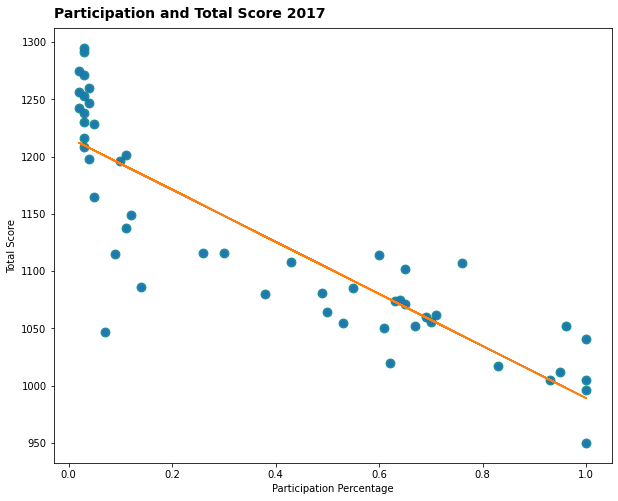

In [127]:
#Total score and participation 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.scatter(data_2017['participation_2017'], data_2017['total_2017'],
          color = 'teal',
          s = 80, 
          alpha = .8,
          label = 'Participation vs Per Pupil Spending')


ax.set_xlabel('Participation Percentage')
ax.set_ylabel('Total Score')
ax.set_title('Participation and Total Score 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

x = np.array(data_2017['participation_2017'])
y = np.array(data_2017['total_2017'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b);

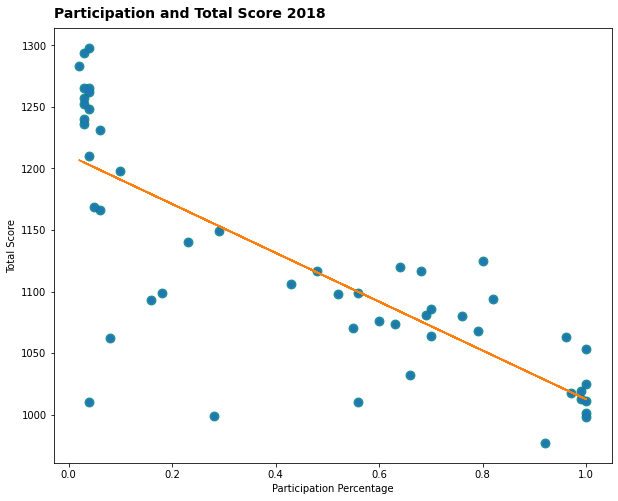

In [128]:
#Total score and participation 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.scatter(data_2018['participation_2018'], data_2018['total_2018'],
          color = 'teal',
          s = 80, #marker size
          alpha = .8, #transpar
          label = 'Participation vs Per Pupil Spending')


ax.set_xlabel('Participation Percentage')
ax.set_ylabel('Total Score')
ax.set_title('Participation and Total Score 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up


x = np.array(data_2018['participation_2018'])
y = np.array(data_2018['total_2018'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b);

*The above scatter plots show a negative correlation between participation and total score*

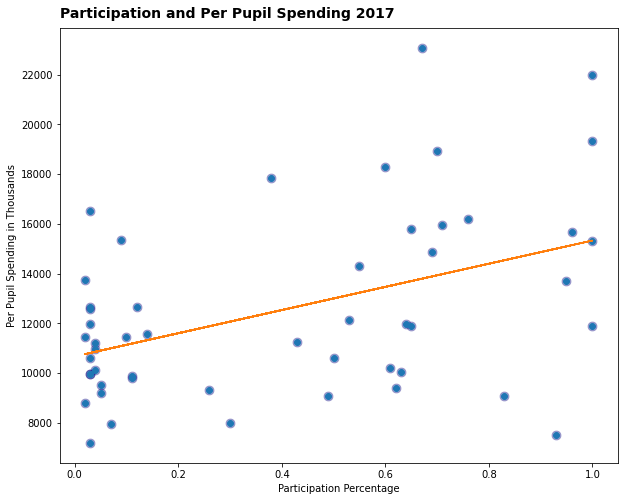

In [129]:
#Total spend and participation 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.scatter(data_2017['participation_2017'], data_2017['total_funding_2017'],
          color = 'navy',
          s = 80, #marker size
          alpha = .3, #transpar
          label = 'Participation vs Per Pupil Spending')


ax.set_xlabel('Participation Percentage')
ax.set_ylabel('Per Pupil Spending in Thousands')
ax.set_title('Participation and Per Pupil Spending 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up
x = np.array(data_2017['participation_2017'])
y = np.array(data_2017['total_funding_2017'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b);

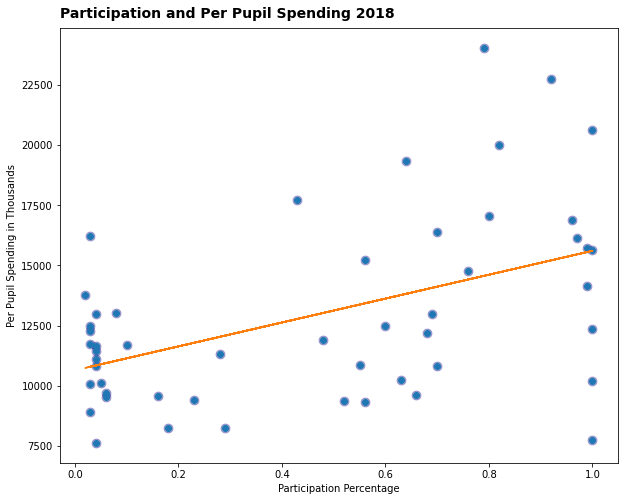

In [130]:
#Total spend and participation 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))



ax.scatter(data_2018['participation_2018'], data_2018['total_funding_2018'],
          color = 'navy',
          s = 80, #marker size
          alpha = .3, #transpar
          label = 'Participation vs Per Pupil Spending')


ax.set_xlabel('Participation Percentage')
ax.set_ylabel('Per Pupil Spending in Thousands')
ax.set_title('Participation and Per Pupil Spending 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

x = np.array(data_2018['participation_2018'])
y = np.array(data_2018['total_funding_2018'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b);

**The above show a slight positive correlation between participation and per pupil spending, but not a strong one**

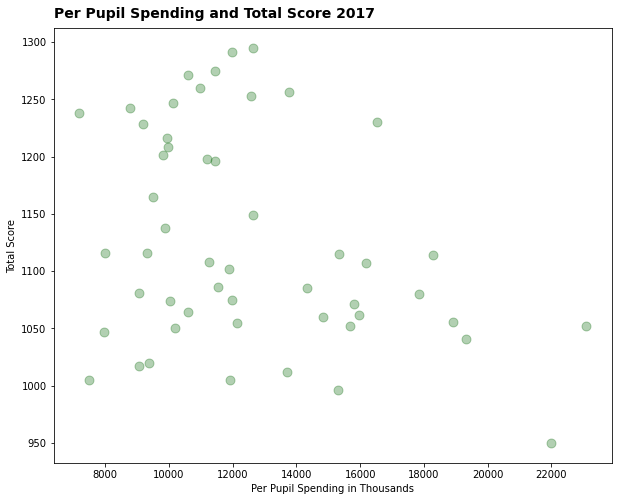

In [131]:
#Total score and participation 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.scatter(data_2017['total_funding_2017'], data_2017['total_2017'],
          color = 'darkgreen',
          s = 80, 
          alpha = .3, 
          label = 'Per Pupil Spending vs Total Score')


ax.set_xlabel('Per Pupil Spending in Thousands')
ax.set_ylabel('Total Score')
ax.set_title('Per Pupil Spending and Total Score 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

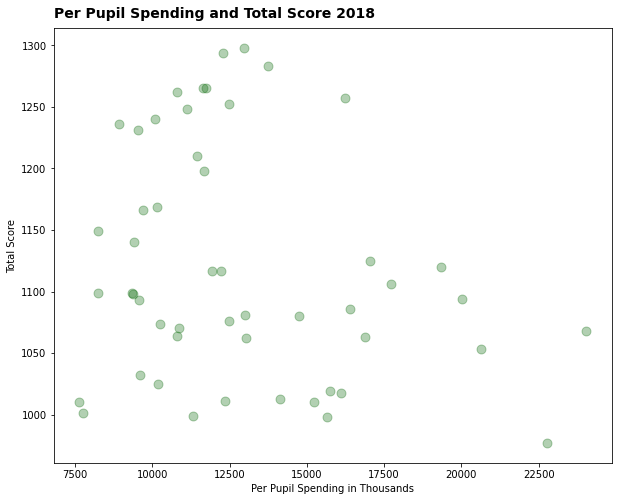

In [132]:
#Total score and participation 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))

ax.scatter(data_2018['total_funding_2018'], data_2018['total_2018'],
          color = 'darkgreen',
          s = 80, #marker size
          alpha = .3, #transpar
          label = 'Per Pupil Spending vs Total Score')


ax.set_xlabel('Per Pupil Spending in Thousands')
ax.set_ylabel('Total Score')
ax.set_title('Per Pupil Spending and Total Score 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

**No strong correlation between per pupil spend and total score**

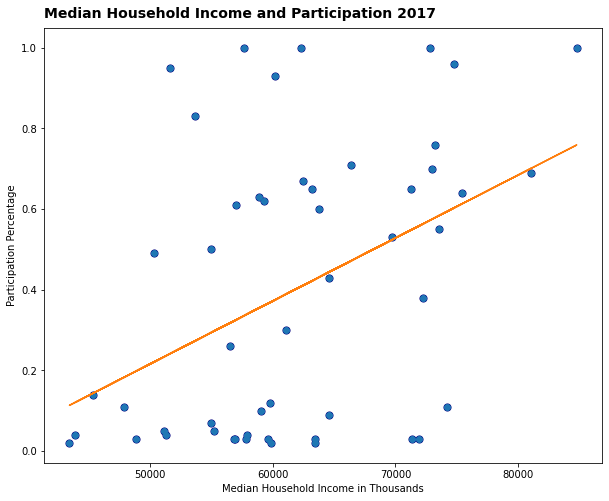

In [133]:
#Income and participation 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))



ax.scatter(data_2017['income_2017'], data_2017['participation_2017'],
          color = 'navy',
          s = 50, #marker size
          #alpha = 1, 
          label = 'Participation vs Median Household Income')


ax.set_xlabel('Median Household Income in Thousands')
ax.set_ylabel('Participation Percentage')
ax.set_title('Median Household Income and Participation 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up


x = np.array(data_2017['income_2017'])
y = np.array(data_2017['participation_2017'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b);

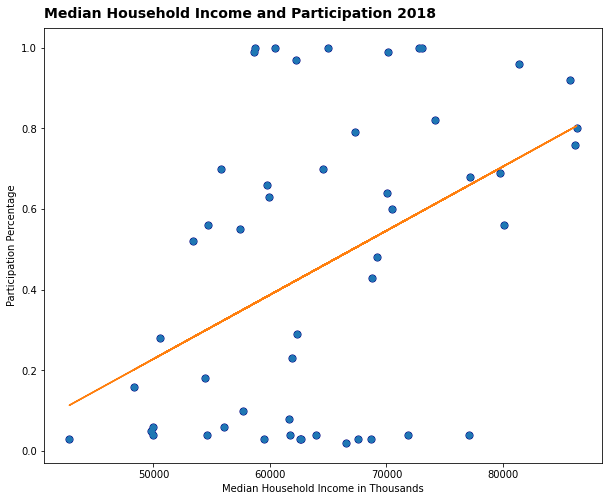

In [134]:
#Income and participation 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))



ax.scatter(data_2018['income_2018'], data_2018['participation_2018'],
          color = 'navy',
          s = 50, #marker size
          #alpha = .8, 
          label = 'Participation vs Median Household Income')


ax.set_xlabel('Median Household Income in Thousands')
ax.set_ylabel('Participation Percentage')
ax.set_title('Median Household Income and Participation 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

x = np.array(data_2018['income_2018'])
y = np.array(data_2018['participation_2018'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

*Slightly positive correlation between participation and income*

### Countrywide choropleth visualizations

In [135]:
#Total score 2017

fig = go.Figure(data=go.Choropleth(
    locations=data_2017['us_state_abbrev'], # Spatial coordinates
    z = data_2017['total_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Total SAT Score',
))

fig.update_layout(
    title_text = 'Total SAT Score by State 2017',
    geo_scope='usa', 
)

fig.show()

In [136]:
#Total score 2018
fig = go.Figure(data=go.Choropleth(
    locations=data_2018['us_state_abbrev'], # Spatial coordinates
    z = data_2018['total_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Total SAT Score',
))

fig.update_layout(
    title_text = 'Total SAT Score by State 2018',
    geo_scope='usa', 
)

fig.show()

In [137]:
#Participation 2017
fig = go.Figure(data=go.Choropleth(
    locations=data_2017['us_state_abbrev'], # Spatial coordinates
    z = data_2017['participation_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Participation Percentage',
))

fig.update_layout(
    title_text = 'Participation by State 2017',
    geo_scope='usa', 
)

fig.show()

In [138]:
#Participation 2018
fig = go.Figure(data=go.Choropleth(
    locations=data_2018['us_state_abbrev'], # Spatial coordinates
    z = data_2018['participation_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Participation Percentage',
))

fig.update_layout(
    title_text = 'Participation by State 2018',
    geo_scope='usa', 
)

fig.show()

In [139]:
#Per pupil spend 2017
fig = go.Figure(data=go.Choropleth(
    locations=data_2017['us_state_abbrev'], # Spatial coordinates
    z = data_2017['total_funding_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Spending USD',
))

fig.update_layout(
    title_text = 'Per Pupil Spending by State 2017',
    geo_scope='usa', 
)

fig.show()

In [140]:
#Per pupil spend 2018
fig = go.Figure(data=go.Choropleth(
    locations=data_2018['us_state_abbrev'], # Spatial coordinates
    z = data_2018['total_funding_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Spending USD',
))

fig.update_layout(
    title_text = 'Per Pupil Spending by State 2018',
    geo_scope='usa', 
)

fig.show()

**Choropleth income visualization**

In [141]:
#Household income 2017
fig = go.Figure(data=go.Choropleth(
    locations=data_2017['us_state_abbrev'], # Spatial coordinates
    z = data_2017['income_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Household Income by State 2017',
    geo_scope='usa', 
)

fig.show()

In [142]:
#Household income 2018
fig = go.Figure(data=go.Choropleth(
    locations=data_2018['us_state_abbrev'], # Spatial coordinates
    z = data_2018['income_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Household Income by State 2018',
    geo_scope='usa', 
)

fig.show()

### More granular analyses of scores, income, spending

**Top 10 and bottom 10 2017** 

In [143]:
top_10_score_2017 = data_2017.sort_values(['total_2017'], ascending=False).head(10)

In [144]:
bottom_10_score_2017 = data_2017.sort_values(['total_2017'], ascending=False).tail(10)

In [145]:
top_10_score_2017

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,us_state_abbrev,total_funding_2017,income_2017
23,Minnesota,0.03,644,651,1295,MN,12647,71920.0
49,Wisconsin,0.03,642,649,1291,WI,11968,63451.0
15,Iowa,0.02,641,635,1275,IA,11461,63481.0
25,Missouri,0.03,640,631,1271,MO,10589,56885.0
16,Kansas,0.04,632,628,1260,KS,10961,57872.0
34,North Dakota,0.02,635,621,1256,ND,13760,59886.0
27,Nebraska,0.03,629,625,1253,NE,12579,59619.0
17,Kentucky,0.04,631,616,1247,KY,10121,51348.0
24,Mississippi,0.02,634,607,1242,MS,8771,43441.0
44,Utah,0.03,624,614,1238,UT,7179,71319.0


In [146]:
bottom_10_score_2017

,state,participation_2017,evidence_based_reading_and_writing_2017,math_2017,total_2017,us_state_abbrev,total_funding_2017,income_2017
10,Georgia,0.61,535,515,1050,GA,10205,57016.0
36,Oklahoma,0.07,530,517,1047,OK,7959,55006.0
6,Connecticut,1.00,530,512,1041,CT,19322,72780.0
43,Texas,0.62,513,507,1020,TX,9375,59295.0
9,Florida,0.83,520,497,1017,FL,9075,53681.0
19,Maine,0.95,513,499,1012,ME,13690,51664.0
12,Idaho,0.93,513,493,1005,ID,7486,60208.0
22,Michigan,1.00,509,495,1005,MI,11907,57700.0
7,Delaware,1.00,503,492,996,DE,15302,62318.0
8,District of Columbia,1.00,482,468,950,DC,21974,84772.0


In [147]:
#top 10 scores + per pupil spending 2017
fig = go.Figure(data=go.Choropleth(
    locations=top_10_score_2017['us_state_abbrev'], # Spatial coordinates
    z = top_10_score_2017['total_funding_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Funding USD',
))

fig.update_layout(
    title_text = 'Top Ten Scoring States and Associated Per Pupil Spending 2017',
    geo_scope='usa', 
)

fig.show()

In [148]:
#bottom 10 scores + per pupil spending 2017
fig = go.Figure(data=go.Choropleth(
    locations=bottom_10_score_2017['us_state_abbrev'], # Spatial coordinates
    z = bottom_10_score_2017['total_funding_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Funding USD',
))

fig.update_layout(
    title_text = 'Bottom Ten Scoring States and Associated Per Pupil Spending 2017',
    geo_scope='usa', 
)

fig.show()

In [149]:
#top 10 scores + household income 2017
fig = go.Figure(data=go.Choropleth(
    locations=top_10_score_2017['us_state_abbrev'], # Spatial coordinates
    z = top_10_score_2017['income_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Top Ten Scoring States and Household Income 2017',
    geo_scope='usa', 
)

fig.show()

In [150]:
#bottom 10 scores + household income 2017
fig = go.Figure(data=go.Choropleth(
    locations=bottom_10_score_2017['us_state_abbrev'], # Spatial coordinates
    z = bottom_10_score_2017['income_2017'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Bottom Ten Scoring States and Income 2017',
    geo_scope='usa', 
)

fig.show()

**Top 10 and bottom 10 2018**

In [151]:
top_10_score_2018 = data_2018.sort_values(['total_2018'], ascending=False).head(10)

In [152]:
top_10_score_2018

,state,participation_2018,evidence_based_reading_and_writing_2018,math_2018,total_2018,us_state_abbrev,total_funding_2018,income_2018
23,Minnesota,0.04,643,655,1298,MN,12975,71817
49,Wisconsin,0.03,641,653,1294,WI,12285,62629
34,North Dakota,0.02,640,643,1283,ND,13758,66505
15,Iowa,0.03,634,631,1265,IA,11732,68718
16,Kansas,0.04,633,631,1265,KS,11653,63938
25,Missouri,0.04,633,629,1262,MO,10810,61726
50,Wyoming,0.03,633,625,1257,WY,16224,62539
27,Nebraska,0.03,629,623,1252,NE,12491,67575
17,Kentucky,0.04,630,618,1248,KY,11110,54555
41,South Dakota,0.03,622,618,1240,SD,10073,59463


In [153]:
bottom_10_score_2018 = data_2018.sort_values(['total_2018'], ascending=False).tail(10)

In [154]:
#top 10 scores + spend 2018
fig = go.Figure(data=go.Choropleth(
    locations=top_10_score_2018['us_state_abbrev'], # Spatial coordinates
    z = top_10_score_2018['total_funding_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Spending USD',
))

fig.update_layout(
    title_text = 'Top Ten Scoring States and Associated Per Pupil Spending 2018',
    geo_scope='usa', 
)

fig.show()

In [155]:
#bottom 10 scores + spend 2018
fig = go.Figure(data=go.Choropleth(
    locations=bottom_10_score_2018['us_state_abbrev'], # Spatial coordinates
    z = bottom_10_score_2018['total_funding_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Per Pupil Spending USD',
))

fig.update_layout(
    title_text = 'Bottom Ten Scoring States and Associated Per Pupil Spending 2018',
    geo_scope='usa', 
)

fig.show()

In [156]:
#top 10 scores + income 2018
fig = go.Figure(data=go.Choropleth(
    locations=top_10_score_2018['us_state_abbrev'], # Spatial coordinates
    z = top_10_score_2018['income_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Top Ten Scoring States and Household Income 2018',
    geo_scope='usa', 
)

fig.show()

In [157]:
#bottom 10 scores + income 2018
fig = go.Figure(data=go.Choropleth(
    locations=bottom_10_score_2018['us_state_abbrev'], # Spatial coordinates
    z = bottom_10_score_2018['income_2018'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'magenta',
    colorbar_title = 'Median Household Income USD',
))

fig.update_layout(
    title_text = 'Bottom Ten Scoring States and Household Income 2018',
    geo_scope='usa', 
)

fig.show()

### Choropleth interpretation

**These maps illustrate in a similar manner the slight but not correlation between columns in all but the correlation between median household income and participation**

**Top 10 and Bottom 10 Scoring States by Household Income Scatterplots**

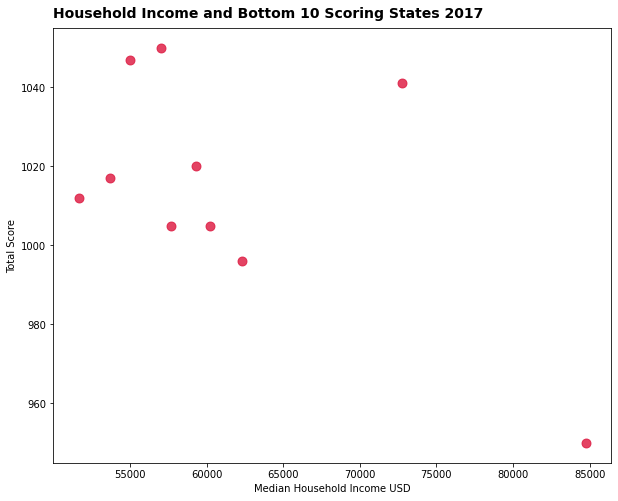

In [158]:
#bottom 10 scores + income 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))


ax.scatter(bottom_10_score_2017['income_2017'], bottom_10_score_2017['total_2017'],
          color = 'crimson',
          s = 80, #marker size
          alpha = .8, #transpar
          label = 'Income vs Bottom 10 Scoring States')


ax.set_xlabel('Median Household Income USD')
ax.set_ylabel('Total Score')
ax.set_title('Household Income and Bottom 10 Scoring States 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

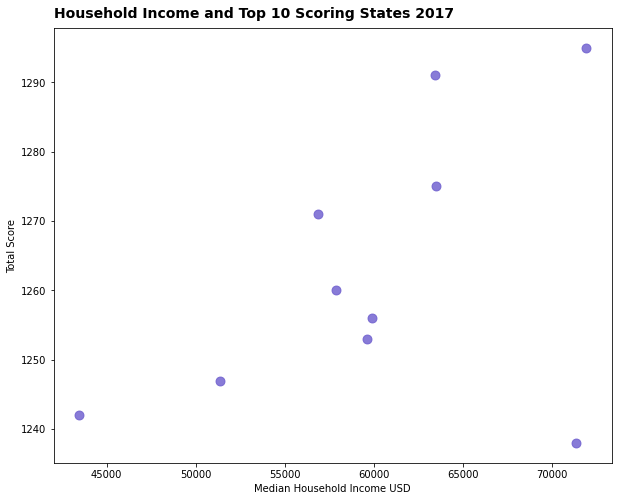

In [159]:
#top 10 scores + income 2017
fig, ax = plt.subplots(1, 1, figsize = (10,8))


ax.scatter(top_10_score_2017['income_2017'], top_10_score_2017['total_2017'],
          color = 'slateblue',
          s = 80, #marker size
          alpha = .8, #transpar
          label = 'Income vs Bottom 10 Scoring States')


ax.set_xlabel('Median Household Income USD')
ax.set_ylabel('Total Score')
ax.set_title('Household Income and Top 10 Scoring States 2017',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

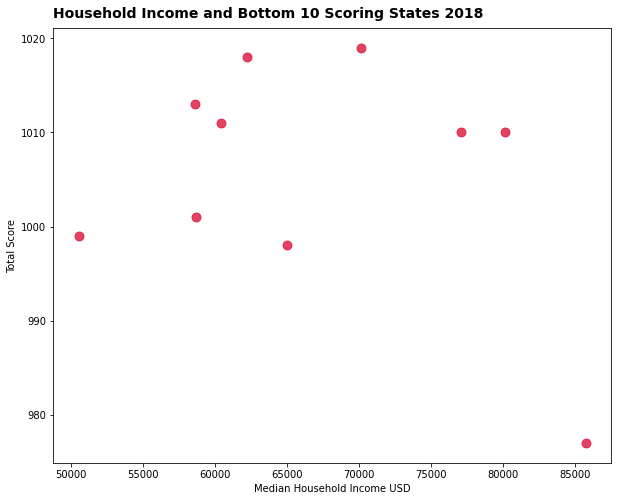

In [160]:
#bottom 10 scores + income 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))


ax.scatter(bottom_10_score_2018['income_2018'], bottom_10_score_2018['total_2018'],
          color = 'crimson',
          s = 80, #marker size
          alpha = .8, #transpar
          label = 'Income vs Bottom 10 Scoring States')


ax.set_xlabel('Median Household Income USD')
ax.set_ylabel('Total Score')
ax.set_title('Household Income and Bottom 10 Scoring States 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

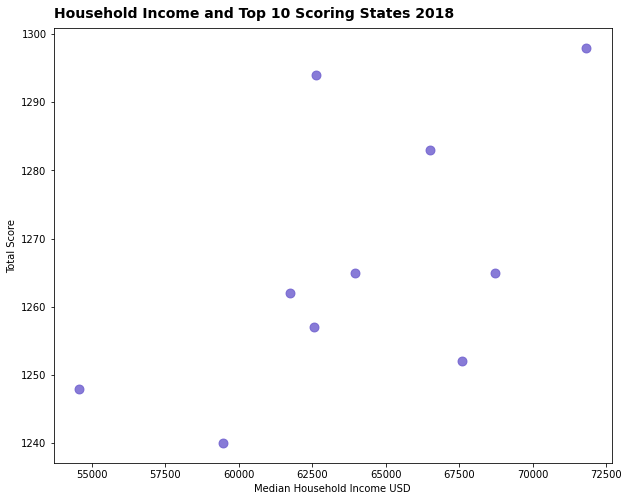

In [161]:
#top 10 scores + income 2018
fig, ax = plt.subplots(1, 1, figsize = (10,8))


ax.scatter(top_10_score_2018['income_2018'], top_10_score_2018['total_2018'],
          color = 'slateblue',
          s = 80, #marker size
          alpha = .8, #transpar
          label = 'Income vs Top 10 Scoring States')


ax.set_xlabel('Median Household Income USD')
ax.set_ylabel('Total Score')
ax.set_title('Household Income and Top 10 Scoring States 2018',
        fontsize = 14, fontweight = 'bold',
         loc = 'left', #alignment: left, center, right
         pad = 10); #move title up

**These more granular scatter plots do not provide much insight, although the top scoring states have slight positive correlations.**

**Heatmaps to display correlation - not much of one**

In [162]:
data_2017.corr()['total_funding_2017'].sort_values()

evidence_based_reading_and_writing_2017   -0.343417
total_2017                                -0.321203
math_2017                                 -0.298494
participation_2017                         0.447520
income_2017                                0.534017
total_funding_2017                         1.000000
Name: total_funding_2017, dtype: float64

<AxesSubplot:>

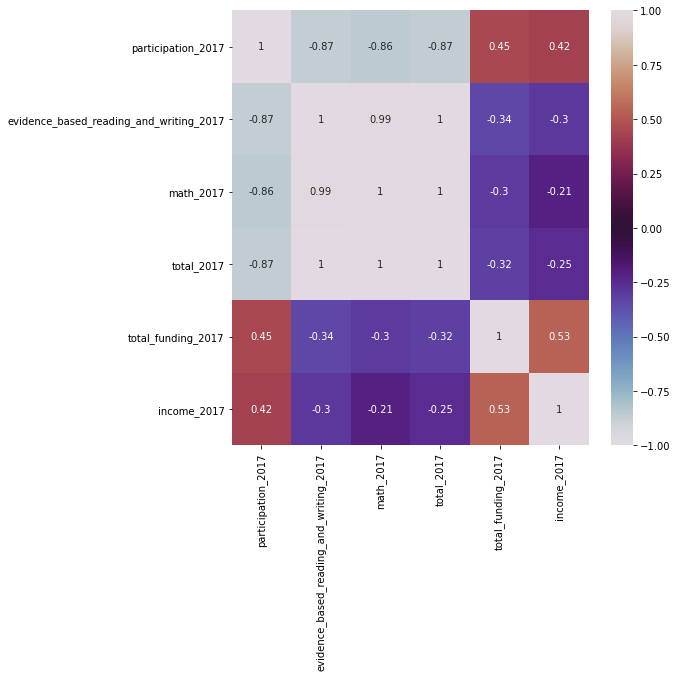

In [163]:
plt.figure(figsize=(8, 8))
sns.heatmap(data_2017.corr(), cmap='twilight', annot=True, vmin =-1, vmax=1) 

In [164]:
data_2018.corr()['total_funding_2018'].sort_values()

evidence_based_reading_and_writing_2018   -0.228948
total_2018                                -0.228114
math_2018                                 -0.220484
participation_2018                         0.480601
income_2018                                0.567815
total_funding_2018                         1.000000
Name: total_funding_2018, dtype: float64

<AxesSubplot:>

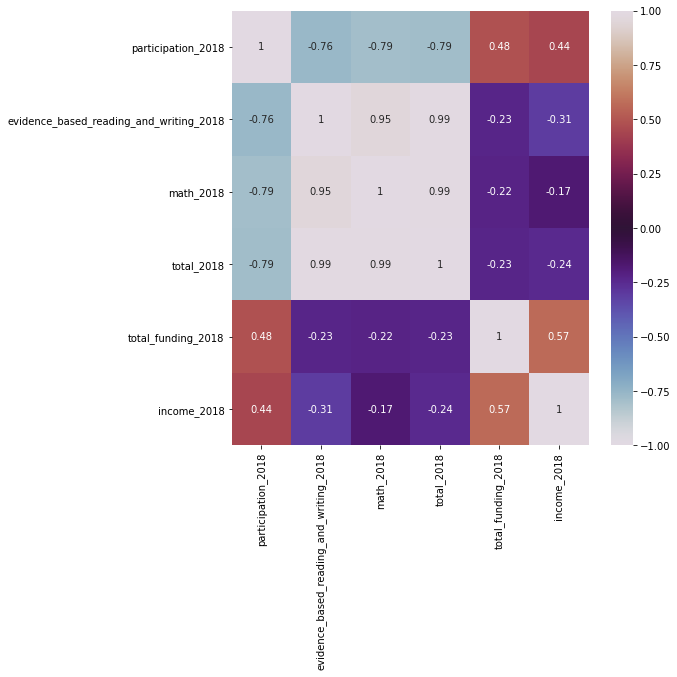

In [165]:
plt.figure(figsize=(8, 8))
sns.heatmap(data_2018.corr(), cmap='twilight', annot=True, vmin =-1, vmax=1) 

## Conclusions and Recommendations

Although we can see a slight correlation between total score and per pupil spending, further study is needed to support the claim that income has any definitive impact on total SAT score. It would appear that per pupil spending and median household income more greatly impact participation rates than SAT scores, and even then the relationship is subtle.

Given the multitudes of income disparities present in any particular state as a whole, it would be more telling to look at individual states and segment by county. A single average score per state does not tell the whole story of what is going on in different school districts where there are different curricula, private schools, public schools, etc. My recommendation would be to isolate states in different regions of the US and from there compare average scores of multiple districts within that state, increasing the number of samples and taking into consideration the diversity of the landscape. 

In looking at the data from 2017 to 2018, overall median scores DECREASED from 1107 to 1098, while per pupil spending and income both increased slightly by ~\\$400 and ~\\$2,700 respectively. In conclusion, if anything this analysis disproved the notion that income plays a part in SAT scores on a national scale, but it would be worth it to perform similar analyses on a more granular scale.


**Sources:**

Data:

https://www.census.gov/programs-surveys/school-finances.html
https://data.world/garyhoov/household-income-by-state
https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf
https://www.census.gov/data/tables/2019/demo/income-poverty/p60-266.html
https://www.sde.idaho.gov/assessment/college/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Code:

https://plotly.com/python/choropleth-maps/
https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python